# Лабораторная работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студенты гр. 1384 Степаненко Денис Владиславович и Белокобыльский Илья Вадимович.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения
Дискретное преобразование Фурье используется для анализа частотного спектра дискретного сигнала и выглядит следующим образом, где N - кол-во отсчетов в сигнале, $x_k$ - дискретный отсчет:
$$X(n)=\sum_{k=0}^{N-1}x_k e^{-j\frac{2\pi kn}{N}}$$

Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка:

$$y_n = \frac{S_{n+1}-S_{n-1}}{2h},$$

где $h=T=1, S_n=e^{i \omega n}$

Квадратурные формулы численного интегрирования:

1. формула прямоугольников:  $$y_{n+1} = y_n + s_{n + \frac{1}{2}}$$

2. формула трапеций: $$y_{n+1}=y_n+\frac{1}{2}\left( s_n + s_{n+1} \right)$$

3. формула Симпсона: $$y_{n+1}=y_{n-1}+\frac{1}{3}\left( s_{n-1} + 4s_n + s_{n+1} \right)$$


## Постановка задачи
Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы
Подготовим необходимые функции для построения графиков.



In [40]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams ['figure.figsize'] = [10, 6]
stem_n = 32
plot_n = 1000

def stem(X, interval, show=True, color='black', label=None):
    plt.stem(np.arange(*interval, (interval[1] - interval[0]) / stem_n), X, linefmt=color, markerfmt=color, label=label)
    if show:
        if label:
            plt.legend()
        plt.grid()
        plt.show()

### Пункт 1


Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида
$A_k\cos(\omega_kt + \varphi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta\omega = 0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета $(N=31)$.

Формула дискретного сигнала: $s(t)=\sum_{k=0}^{k=10}A_k cos(\omega_k t + \phi_k)$

Значения $A_k$ и $\varphi_k$ были получены с помощью генератора чисел np.random,
амплитуды гормоник были нормализованы по формуле: $A_k= \frac{A_k}{\sum_{i=0}^{10} A_i}$


In [41]:
omega_k = np.arange(0, np.pi + 0.1 * np.pi, 0.1 * np.pi)
A_k = np.random.randint(1, 11, 11)
print(f"A_k до нормализации: {A_k}\n")

A_k = A_k / sum(A_k)
phi_k = np.random.random(size=11) / 2

print(f"A_k после нормализации: {A_k}\n")
print(f"phi_k: {phi_k}\n")


A_k до нормализации: [4 1 3 9 3 3 9 3 5 6 5]

A_k после нормализации: [0.07843137 0.01960784 0.05882353 0.17647059 0.05882353 0.05882353
 0.17647059 0.05882353 0.09803922 0.11764706 0.09803922]

phi_k: [0.10990291 0.18987435 0.08671297 0.01412781 0.05646383 0.37464742
 0.35352697 0.21407655 0.10062353 0.20914542 0.15104544]



### Пункт 2.


Визуализировать исходные аналоговый и дискретизированный сигналы.

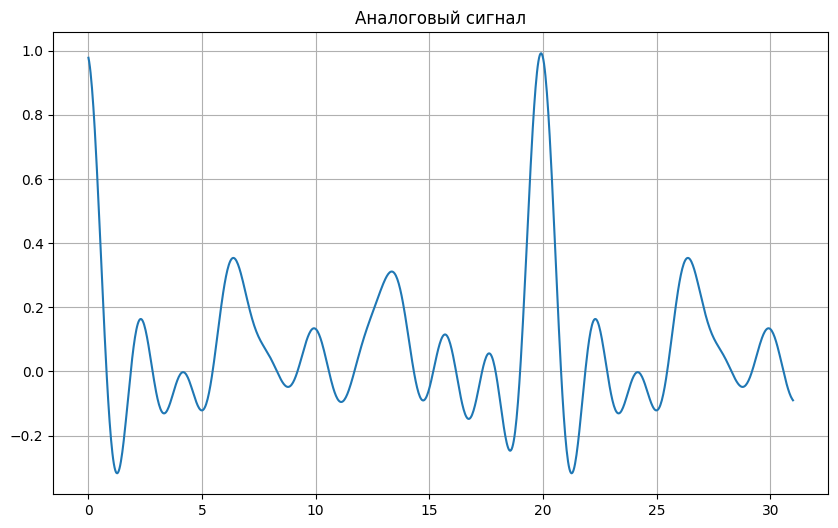

In [42]:
s = lambda k: sum(A_k[i] * np.cos(omega_k[i] * k + phi_k[i]) for i in range(11))
space = np.linspace(0, 31, 1000)
plt.plot(space, [s(x) for x in space])
plt.title('Аналоговый сигнал')
plt.grid()
plt.show()

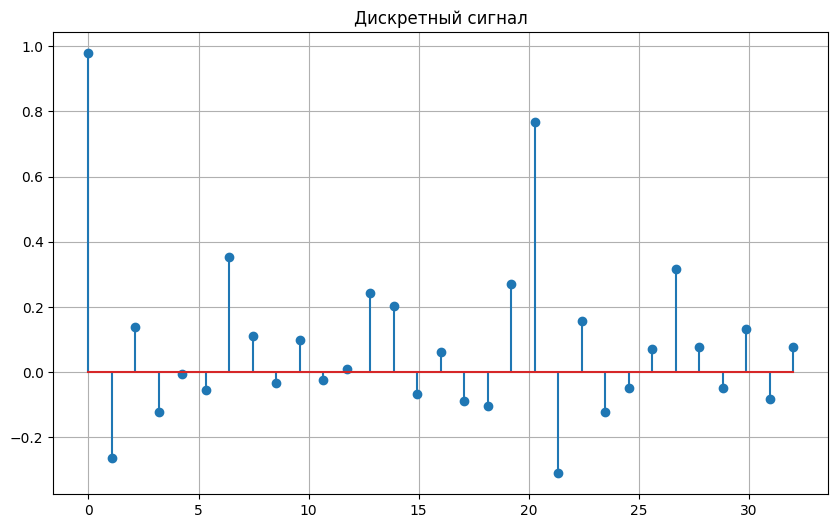

In [43]:
X, Y = [], []
n = 31
start = 0
end = 32
for i in range(n):
    x = start + i / (n-1) * (end - start)
    Y.append(s(x))
    X.append(x)
plt.grid()
plt.stem(X, Y)
plt.title('Дискретный сигнал')
plt.show()

###  Пункт 3.


С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

$X(n)=\sum_{k=0}^{N-1}x_k e^{-j\frac{2\pi kn}{N}}$

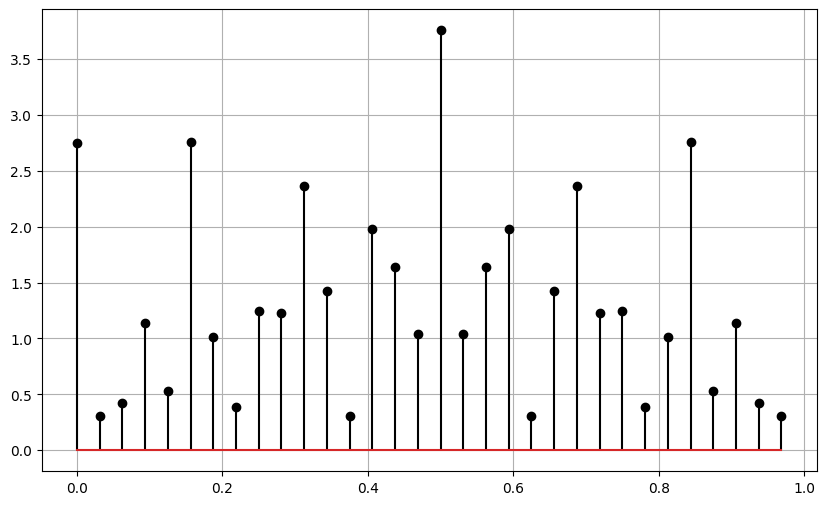

In [44]:
def dft(x, n):
    N = len(x)
    dft_val = sum( x[k] * np.exp(-2j * np.pi * k * n / N) for k in range(N) )
    return dft_val

x = [s(k) for k in range(32)]
dft_vals = np.abs([dft(x, n) for n in range(32)])

stem(dft_vals, [0, 1])

###  Пункт 4.

Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

Линейное сглаживание выполняется по формулам:
$$y_n = \frac{1}{5}\left(\sum_{k=n-2}^{k=n+2}x_k\right)$$

$$y_n = \frac{1}{9}\left(\sum_{k=n-4}^{k=n+4}x_k\right)$$

В третьей лабораторной работы были получены формулы:
$$H_5(\omega)=\frac{\sin\left(\frac{5\omega}{2}\right)}{5\cdot \sin\left( \frac{\omega}{2} \right)}$$

$$H_9(\omega)=\frac{\sin\left(\frac{9\omega}{2}\right)}{9\cdot \sin\left( \frac{\omega}{2} \right)}$$

###  Пункт 5.

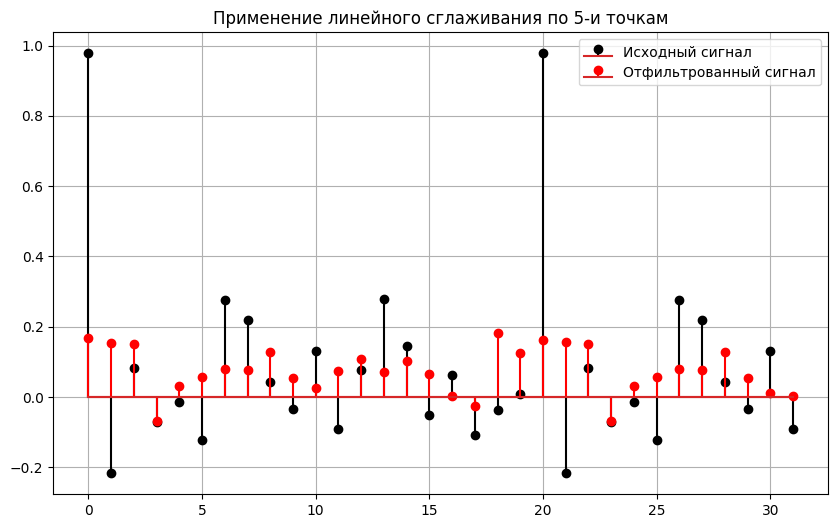

In [45]:
x_5_lin = np.convolve(x, np.ones(5) / 5, 'same')

plt.title('Применение линейного сглаживания по 5-и точкам')
stem(x, [0,32], show=False, label='Исходный сигнал')
stem(x_5_lin, [0,32], color='red', label='Отфильтрованный сигнал')

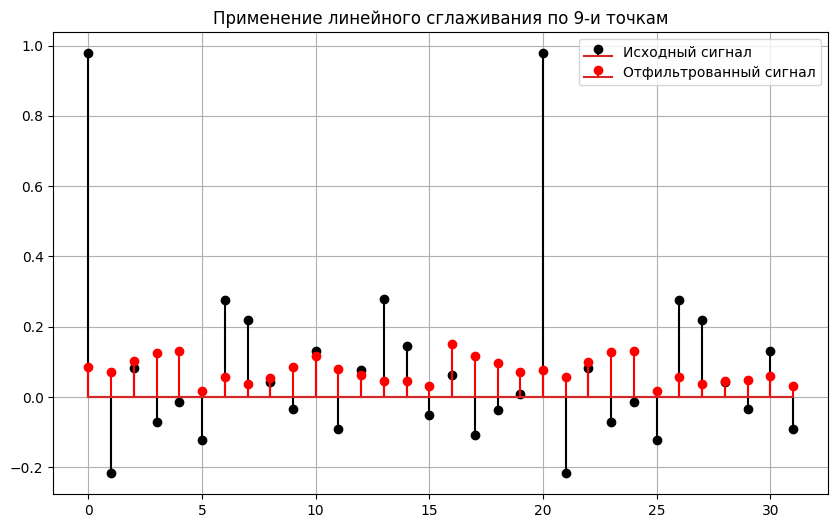

In [46]:
x_9_lin = np.convolve(x, np.ones(9) / 9, 'same')

plt.title('Применение линейного сглаживания по 9-и точкам')
stem(x, [0,32], show=False, label='Исходный сигнал')
stem(x_9_lin, [0,32], color='red', label='Отфильтрованный сигнал')

###  Пункт 6.

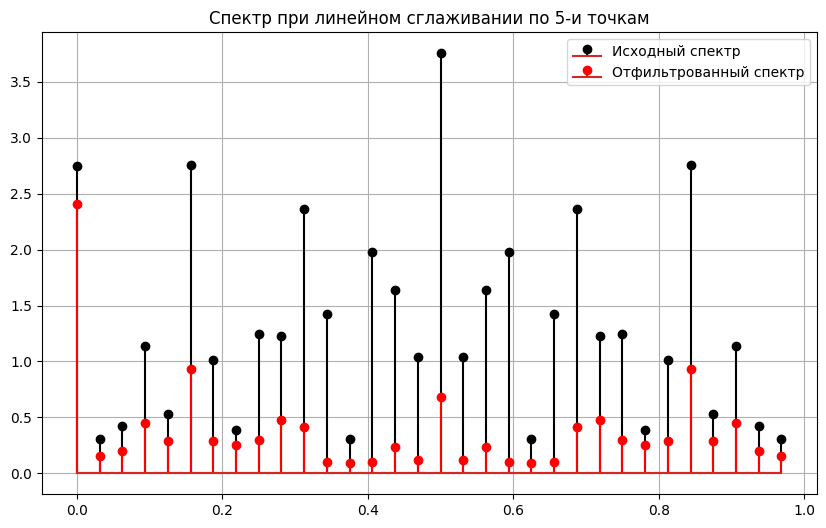

In [47]:
dft_5_lin = np.abs([dft(x_5_lin, n) for n in range(32)])

plt.title('Спектр при линейном сглаживании по 5-и точкам')
stem(dft_vals, [0, 1], show=False, label='Исходный спектр')
stem(dft_5_lin, [0, 1], color='red', label='Отфильтрованный спектр')

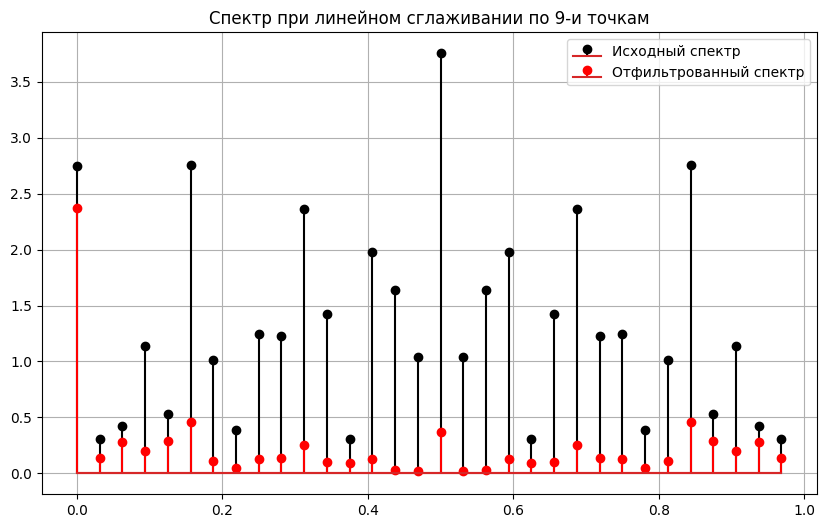

In [48]:
dft_9_lin = np.abs([dft(x_9_lin, n) for n in range(32)])

plt.title('Спектр при линейном сглаживании по 9-и точкам')
stem(dft_vals, [0, 1], show=False, label='Исходный спектр')
stem(dft_9_lin, [0, 1], color='red', label='Отфильтрованный спектр')

###  Пункт 7.
Исходя из полученного спектра можно сделать вывод, что с увеличением частоты сигнал подвергается более сильному ослаблению. При этом с увеличением числа точек в фильтре высокочастотный шум ослабляется сильнее, в связи с тем, что больший фильтр усредняет больше значений. Это соответствует передаточной функции фильтра $H(\omega)$.

###  Пункт 8a.

Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка:

$$y_n = \frac{S_{n+1}-S_{n-1}}{2h},$$

где $h=T=1, S_n=e^{i \omega n}$

Передаточная функция:

$$H(\omega)=\frac{e^{i\omega}-e^{-i\omega}}{2}=i\cdot sin(\omega)$$

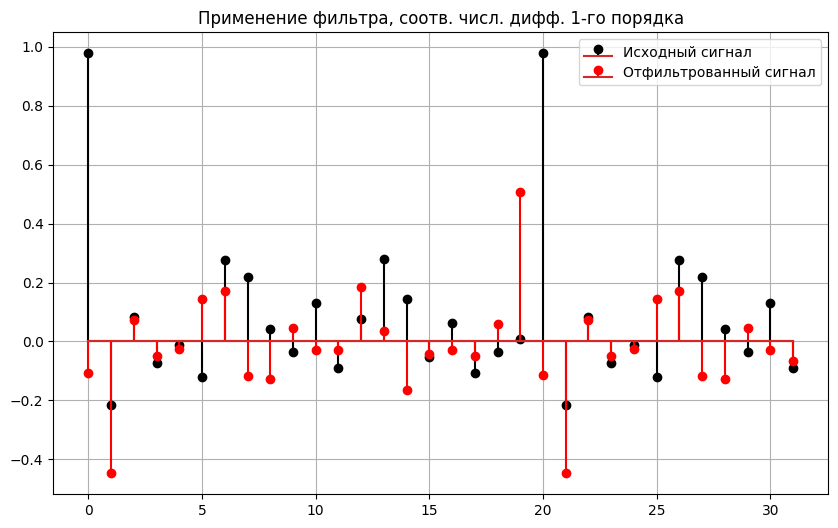

In [49]:
x_diff = np.convolve(x, np.array([1, 0, -1]) / 2, 'same')

plt.title('Применение фильтра, соотв. числ. дифф. 1-го порядка')
stem(x, [0, 32], show=False, label='Исходный сигнал')
stem(x_diff, [0, 32], color='red', label='Отфильтрованный сигнал')

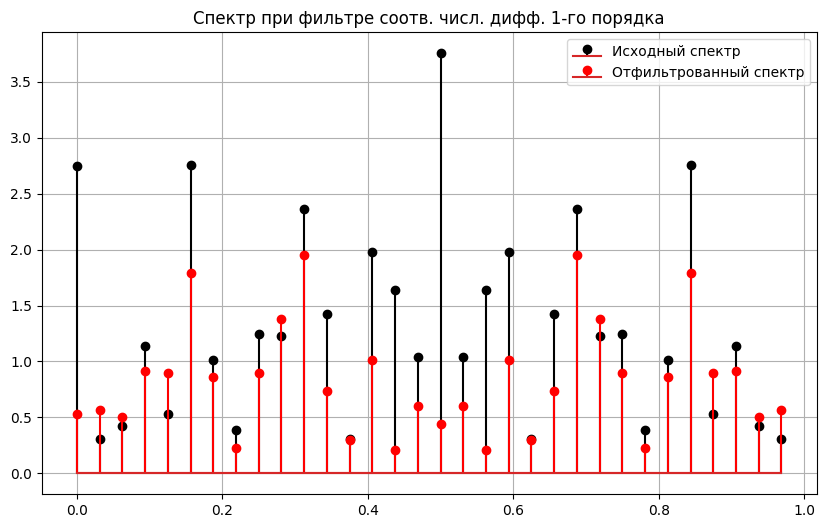

In [50]:
dft_diff = np.abs([dft(x_diff, n) for n in range(32)])

plt.title('Спектр при фильтре соотв. числ. дифф. 1-го порядка')
stem(dft_vals, [0, 1], show=False, label='Исходный спектр')
stem(dft_diff, [0, 1], color='red', label='Отфильтрованный спектр')

Исходя из полученного спектра можно сделать вывод, что степень подавления сигнала с увеличением частоты то ослабляется, то увеличивается согласно графику передаточной функции, полученному в предыдущих лабораторных работах. На средних частотах происходит подавление сравнимое с низкими и высокими чатотами.

###  Пункт 8b.

Дискретные фильтры, соответствующие численному интегрированию (прямоугольников, трапеций, Симпсона):
1. формула прямоугольников:  $$y_{n+1} = y_n + s_{n + \frac{1}{2}}$$

2. формула трапеций: $$y_{n+1}=y_n+\frac{1}{2}\left( s_n + s_{n+1} \right)$$

3. формула Симпсона: $$y_{n+1}=y_{n-1}+\frac{1}{3}\left( s_{n-1} + 4s_n + s_{n+1} \right)$$


Передаточные функции:
$$H(\omega)=\frac{1}{2i \cdot sin\left( \frac{\omega}{2} \right)}$$

$$H(\omega)=\frac{cos\left( \frac{\omega}{2} \right)}{2isin\left( \frac{\omega}{2} \right)}$$

$$H(\omega)=\frac{2+cos(\omega)}{3sin(\omega)}$$

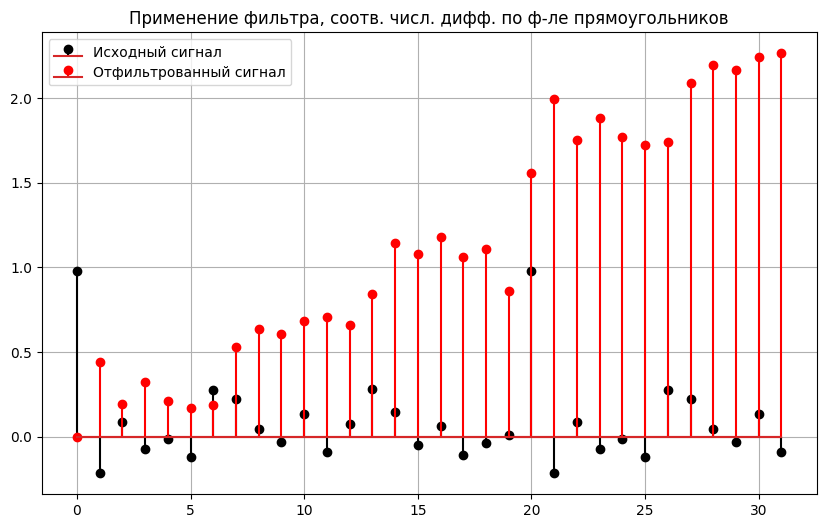

In [51]:
def rectangle(x):
    y = [0 for _ in x]
    for i in range(0, len(y) - 1):
        y[i + 1] = y[i] + s(i + 1 / 2)
    return y


x_rect = rectangle(x)
plt.title('Применение фильтра, соотв. числ. дифф. по ф-ле прямоугольников')
stem(x, [0, 32], show=False, label='Исходный сигнал')
stem(x_rect, [0, 32], color='red', label='Отфильтрованный сигнал')

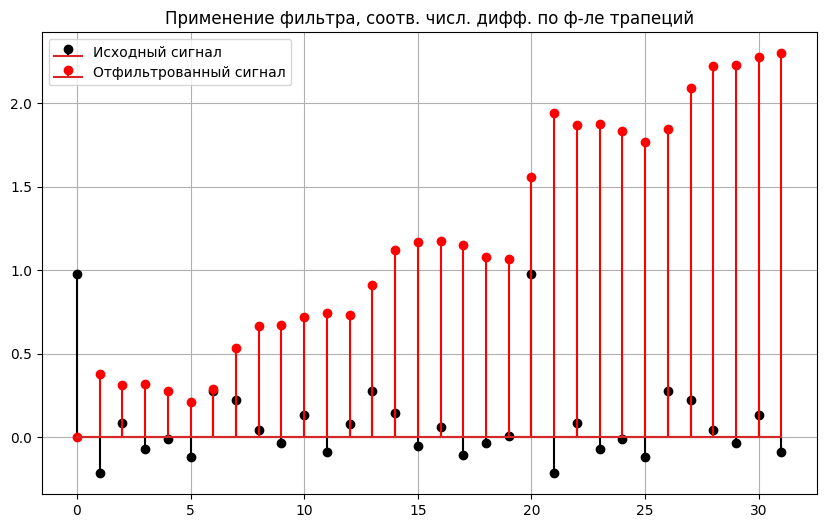

In [52]:
def trapez(x):
    y = [0 for _ in x]
    for i in range(0, len(y) - 1):
        y[i + 1] = y[i] + (x[i] + x[i + 1]) / 2
    return y


x_trapez = trapez(x)
plt.title('Применение фильтра, соотв. числ. дифф. по ф-ле трапеций')
stem(x, [0, 32], show=False, label='Исходный сигнал')
stem(x_trapez, [0, 32], color='red', label='Отфильтрованный сигнал')

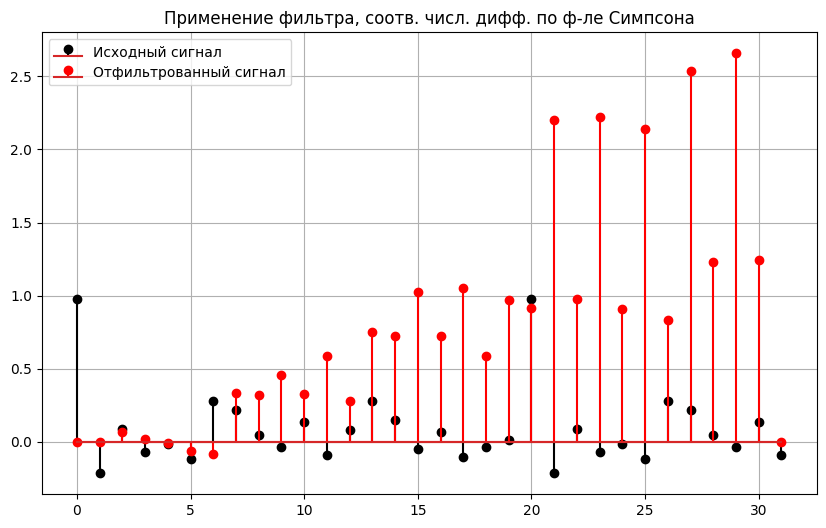

In [53]:
def simpson(x):
    y = [0 for _ in x]
    for i in range(1, len(y) - 2):
        y[i + 1] = y[i - 1] + (x[i - 1] + 4 * x[i] + x[i + 1]) / 3
    return y


x_simpson = simpson(x)
plt.title('Применение фильтра, соотв. числ. дифф. по ф-ле Симпсона')
stem(x, [0, 32], show=False, label='Исходный сигнал')
stem(x_simpson, [0, 32], color='red', label='Отфильтрованный сигнал')

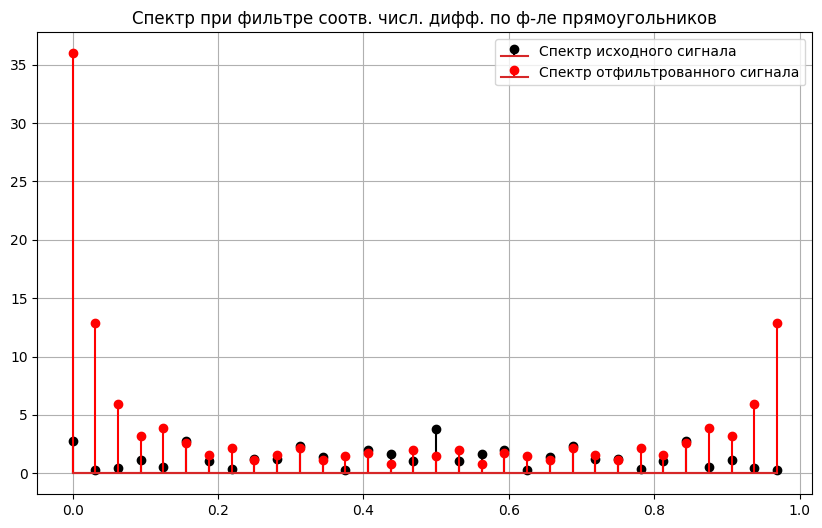

In [54]:
dft_rect = np.abs([dft(x_rect, n) for n in range(32)])

plt.title('Спектр при фильтре соотв. числ. дифф. по ф-ле прямоугольников')
stem(dft_vals, [0, 1], show=False, label='Спектр исходного сигнала')
stem(dft_rect, [0, 1], color='red', label='Спектр отфильтрованного сигнала')

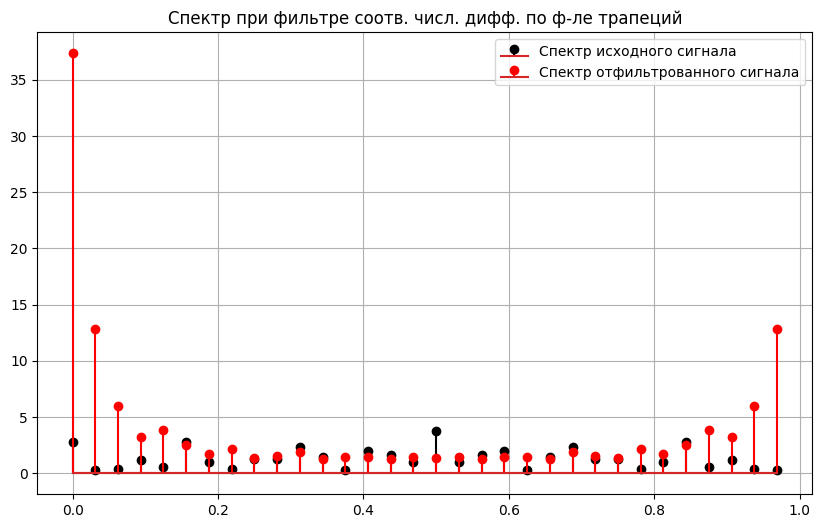

In [55]:
dft_trapez = np.abs([dft(x_trapez, n) for n in range(32)])

plt.title('Спектр при фильтре соотв. числ. дифф. по ф-ле трапеций')
stem(dft_vals, [0, 1], show=False, label='Спектр исходного сигнала')
stem(dft_trapez, [0, 1], color='red', label='Спектр отфильтрованного сигнала')

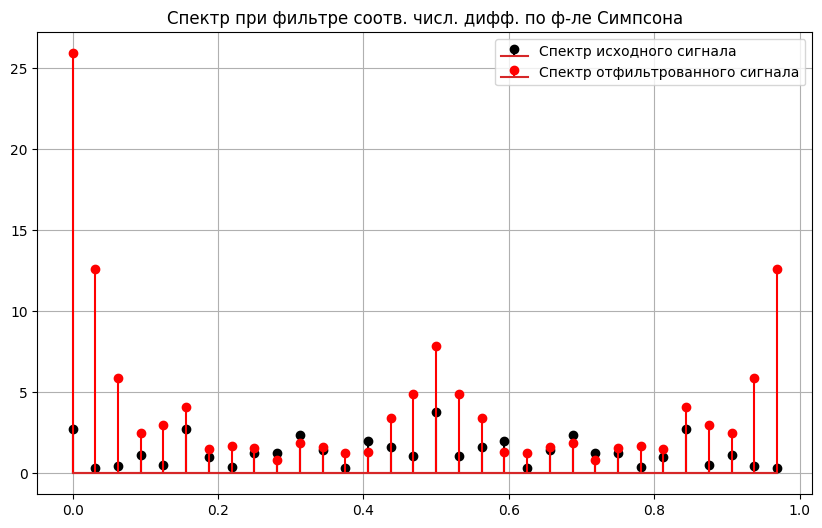

In [56]:
dft_simpson = np.abs([dft(x_simpson, n) for n in range(32)])

plt.title('Спектр при фильтре соотв. числ. дифф. по ф-ле Симпсона')
stem(dft_vals, [0, 1], show=False, label='Спектр исходного сигнала')
stem(dft_simpson, [0, 1], color='red', label='Спектр отфильтрованного сигнала')

Исходя из полученного спектра можно сделать вывод, что сигнал на низких и высоких частотах усиливается согласно графикам передаточных функций. Однако график со спектром по формуле симпсора оличается тем, что средние частоты тоже усиливаются, согласно передаточной функции.

###  Пункт 9.

Был сформирован сигнал - линейная комбинация из 11 косинусоид. Амплитуды, заданные случайно, были нормализованы. После дискретизации с шагом 1 исходный непрерывный сигнал был представлен в виде 32 отсчетов. Дискретный сигнал сохраняет основные характеристики и подходит для анализа, который был проведен далее.

За счет дискретного преобразования Фурье был визуализирован спектр сигнала. Таким образом, было выявлено наличие в исходном сигнале множества различных частот.

Линейное сглаживание показало снижение амплитуд при высоких частотах. При этом сглаживание на 9 точек было более эффективным в этом. Полиномиальное сглаживание показало похожие результаты, но с лучшей передачей формы сигнала.

Применение фильтра, соответствующего дифференцированию первого порядка, не трогает средние частоты, подавляет низкие и высокие частоты. Однако интерпретакию результата сильно затрудняет эффект Гиббса, вызывающий аномальные колебания при фильтрации. Фильтры на основе численного интегрирования по формулам трапеций и прямоугольников подавляет низкие частоты, усиливает средние и высокие. В отличие от них, формула Симпсона пропускает средние. Все спектры сигналов соответствуют предполагаемым по формулам переходных функций.

## Выводы

В ходе выполнения лабораторной работы был сформирован дискретный сигнал, для которого впоследствии была осуществлена фильтрация дискретных последовательностей с помощью линейных фильтров и рекурсивных фильтров на основе численного дифференцирования первого порядка и методов чиленного интегрирования: прямоугольников, трапеций, Симпсона. При помощи дискретного преобразования Фурье были найдены отсчеты спектра для исходного и отфильтованного сигналов. Также был проведен анализ преобразований исходного сигнала с целью выявления влияния фильтров на поведение сигнала.